# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm

# Preprocessing data

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# visualization of data

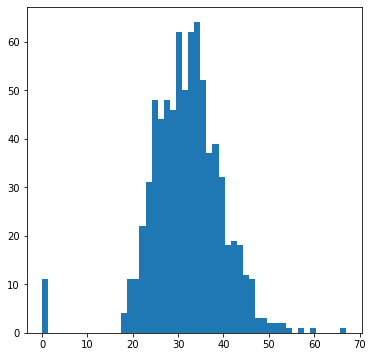

In [5]:
plt.figure(figsize=(6, 6))
plt.hist(df['BMI'], bins=50)
plt.show()

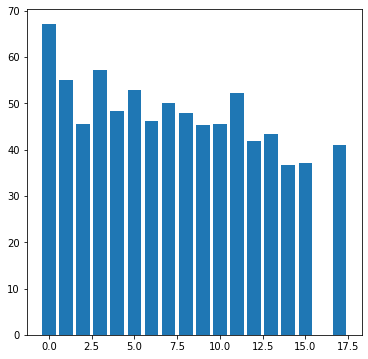

In [6]:
plt.figure(figsize=(6, 6))
plt.bar(df['Pregnancies'], df['BMI'])
plt.show()

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
x = df.drop(columns='Outcome', axis=1)
y = df['Outcome'].values

In [9]:
# standard scalar
sc = StandardScaler()
x = sc.fit_transform(x)

In [10]:
# splite into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
# Making the Model

model = svm.SVC(kernel='linear')

In [12]:
model.fit(x_train, y_train)

SVC(kernel='linear')

# Model Evaluation

In [13]:
# training data 
model.score(x_train, y_train)

0.7638436482084691

In [14]:
pred = model.predict(x_test)

In [15]:
print(confusion_matrix(y_test, pred))

[[98  9]
 [18 29]]


In [16]:
df[df['Outcome']== 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


# Making Prediction Model

In [17]:
def Diebatic_prediction(Pregnancies=1, Glucose=90, BloodPressure=80, SkinThickness=22, Insulin=90, BMI=50,
                        DiabetesPedigreeFunction=0.471, Age=26,):
    data = np.zeros(8)
    
    data[0] = Pregnancies
    data[1] = Glucose
    data[2] = BloodPressure
    data[3] = SkinThickness
    data[4] = Insulin
    data[5] = BMI
    data[6] = DiabetesPedigreeFunction
    data[7] = Age
    
    data = sc.transform(data.reshape(1, -1))
    pred = model.predict(data)
    
    if pred[0] == 1:
        print('You have Diabetic')
    else:
        print("No Diabetic")

In [18]:
Diebatic_prediction()

No Diabetic


C:\Users\ravim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
